In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [383]:
#constants

HBM = 7.6359  #eV
E2 = 14.409  #eV
a0 = 0.539 #Angstrom
alpha = 2*a0

In [366]:
def aeq(a,S):
    return a0/(1+ np.exp(-S/a))-a


#returns the value of a by solving the transcedental equation

def solvea(S,n=100):
    
    l,m=0.1,1 #Angstrom
    
    for i in range(n):
        
        fl=aeq(l,S)
        fm=aeq(m,S)
        
        
        p=(l+m)/2
        
        fp=aeq(p,S)
        
        if fl*fm<0:
            
            if fl*fp<0:
                m=p
            else:
                fp*fm<0
                l=p
        else:
               break

    return p

In [78]:
def distance(x1,y1,z1):
    return np.sqrt(x1**2 +y1**2 +z1**2)



def R12(r1,r2):
    #euclidean distance
    x1 = r1[0];
    y1 = r1[1];
    z1 = r1[2];
    
    x2 = r2[0];
    y2 = r2[1];
    z2 = r2[2];
    
    return distance(x1-x2,y1-y2,z1-z2)

def Rl(r,S):
    x = r[0];
    y = r[1];
    z = r[2];
    
    return distance(x,y,z+S/2)

def Rr(r,S):
    x = r[0];
    y = r[1];
    z = r[2];
    
    return distance(x,y,z-S/2)
    
    

In [79]:
#Wavefunction

def wavefunction(r1,r2,beta,S):
    
    alpha = 2*a0;
    a = solvea(S)
    
    r12=R12(r1,r2)
    rL1=Rl(r1,S)
    rL2=Rl(r2,S)
    rR1=Rr(r1,S)
    rR2=Rr(r2,S)
    
    
    phi1 = np.exp(-rL1/a) + np.exp(-rR1/a);
    phi2 = np.exp(-rL2/a) + np.exp(-rR2/a);
    
    
    f = np.exp(r12/(alpha*(1+beta*r12)));
    
    phi = phi1*phi2*f;
    
    return phi**2;


In [175]:
q = np.array([3,4,5])

In [177]:
q[0]+5

8

In [280]:
#MCMC

def MCMCrun(r1,r2,step,beta,S):
    
    "Takes Input in rx,ry,rz form"
    x1 = r1[0];
    y1 = r1[1];
    z1 = r1[2];
    
    x2 = r2[0];
    y2 = r2[1];
    z2 = r2[2];
    
    change1 = step*(2*np.random.rand()-1)
    
    change2 = step*(2*np.random.rand()-1)
    
    rt1 = [x1+change1,y1+change1,z1+change1]
    
    rt2 = [x2+change2,y2+change2,z2+change2]   
    
    eta = np.random.uniform(0,1);
    
    
    #print(rt1,r1)
    
    R = wavefunction(rt1,rt2,beta,S)/wavefunction(r1,r2,beta,S);
   
    #print(R)
    #use acceptance ratio to evaluate efficiency
        
    if R>eta:
        rnew1 = rt1;
        rnew2 = rt2;
        acc = 1
    else:
        rnew1 = r1;
        rnew2 = r2;
        acc = 0
        
    return rnew1,rnew2,acc

In [311]:
thermalise = 100
r1 = [[0.5,0.5,0.5]]
r2 = [[0.5,0.5,-0.5]]
Acc = 0
delta = 0.4;
beta = 0.2;
S = 0.5;
for i in range(thermalise):
    r1[0],r2[0],acc = MCMCrun(r1[0],r2[0],delta,beta,S)
    Acc = Acc + acc
    

In [312]:
r1

[[0.114414401737185, 0.114414401737185, 0.114414401737185]]

In [313]:
r2

[[0.5196848183267286, 0.5196848183267286, -0.480315181673271]]

In [314]:
Acc

60

In [310]:
MCMCrun(r1[0],r2[0],delta,beta,S)

([0.0835560495285576, 0.0835560495285576, 0.0835560495285576],
 [0.06829329633854037, 0.06829329633854037, -0.9317067036614606],
 1)

In [408]:
Acc

5402

In [350]:
r1 = np.array(r1)

In [351]:
r2 = np.array(r2)

In [352]:
r1[:,0]

array([0.1810397 , 0.00521779, 0.00521779, ..., 0.1874295 , 0.48170608,
       0.28599037])

(array([  7.,  13.,  15.,  48., 160., 279., 277., 154.,  28.,  20.]),
 array([-0.95625011, -0.79056873, -0.62488735, -0.45920597, -0.29352459,
        -0.12784321,  0.03783817,  0.20351955,  0.36920093,  0.53488231,
         0.70056369]),
 <BarContainer object of 10 artists>)

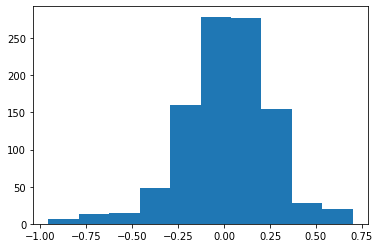

In [347]:
plt.hist(r1[:,1])

In [377]:
def chi(r,a):
    return np.exp(-r/a)

def FDchi(r,a):
    return -chi(r,a)/a

def SDchi(r,a):
    return chi(r,a)/(a**2)

def lapchi(r,a):
    return SDchi(r,a)+2*FDchi(r,a)/r

def F(r,alpha,beta):
    return np.exp(r/(alpha*(1+beta*r)))

def FD(r,alpha,beta):
    return F(r,alpha,beta)/(alpha*(1+beta*r)**2)

def SD(r,alpha,beta):
    return ((FD(r,alpha,beta)**2)/F(r,alpha,beta)) - 2*beta*F(r,alpha,beta)/(alpha*(1+beta)**3)

def LapF(r,alpha,beta):
    return SD(r,alpha,beta)


In [373]:
F(0,1,2)

1.0

In [354]:
def Phi(r1,r2,beta,S):
    
    alpha = 2*a0;
    a = solvea(S)
    
    r12=R12(r1,r2)
    rL1=Rl(r1,S)
    rL2=Rl(r2,S)
    rR1=Rr(r1,S)
    rR2=Rr(r2,S)
    
    
    phi1 = np.exp(-rL1/a) + np.exp(-rR1/a);
    phi2 = np.exp(-rL2/a) + np.exp(-rR2/a);
    
    
    f = np.exp(r12/(alpha*(1+beta*r12)));
    
    phi = phi1*phi2*f;
    
    return phi;


In [386]:
#local energy


def epsilon(r1,r2,beta,S):
    
    a = solvea(S)
    
    x1 = r1[0];
    y1 = r1[1];
    z1 = r1[2];
    
    x2 = r2[0];
    y2 = r2[1];
    z2 = r2[2];
    
    R1R =  Rr(r1,S)
    R1L =  Rl(r1,S)
    R2R =  Rr(r1,S)
    R2L =  Rl(r1,S)
    
    r12 = R12(r1,r2)
    #calculate dot products with R12
    R12DR1 = x1*(x1-x2)+y1*(y1-y2)+z1*(z1-z2) 
    SR12Z = S*(z1-z2)/2
    
    
    DOTR1L = R12DR1+SR12Z #Dot product with r12
    DOTR1R = R12DR1-SR12Z
    DOTR2L = DOTR1L-r12**2
    DOTR2R = DOTR1R-r12**2
    DOTR1L = DOTR1L/r12/R1L

    DOTR2L = DOTR2L/r12/R2L #Unit vector of above dot products
    DOTR1R = DOTR1R/r12/R1R
    DOTR2R = DOTR2R/r12/R2R

   
    
    CHI1 = chi(R1R,S)+chi(R1L,S)
    CHI2 = chi(R2R,S)+chi(R2L,S)
    f=F(r12,alpha,beta)
    
    
    EECORR = 2*LapF(r12,alpha,beta)/f
    ONEE1 = (lapchi(R1L,a)+lapchi(R1R,a))/CHI1 #electron one
    ONEE2 = (lapchi(R2L,a)+lapchi(R2R,a))/CHI2 #electron two
    
    
    CROSS1 = (FDchi(R1L,a)*DOTR1L+FDchi(R1R,a)*DOTR1R)/CHI1 #cross terms
    CROSS2 = (FDchi(R2L,a)*DOTR2L+FDchi(R2R,a)*DOTR2R)/CHI2
    CROSS = 2*FD(r12,alpha,beta)*(CROSS1-CROSS2)/f

    
    TPOP = -HBM*(EECORR+ONEE1+ONEE2+CROSS)/2 #kinetic
    VPOP = -E2*(1./R1L + 1./R1R + 1./R2L + 1./R2R - 1./r12) #potential
    ELOCAL=TPOP+VPOP
    
    return ELOCAL
    

In [622]:
epsilon(r1,r2,beta,S)

-40.41862524758719

In [348]:
thermalise = 50

r1 = [[0.5,0.5,0.5]]
r2 = [[0.5,0.5,-0.5]]
Acc = 0
delta = 0.4;
beta = 0.2;
S = 0.5;
for i in range(thermalise):
    r1[0],r2[0],acc = MCMCrun(r1[0],r2[0],delta,beta,S)
    Acc = Acc + acc
    

Acc = 0
Nsteps = 10000

for i in range(Nsteps):
    rn1,rn2,acc = MCMCrun(r1[i],r2[i],delta,beta,S)
    r1.append(rn1)
    r2.append(rn2)
    Acc = Acc + acc

In [420]:
e = []

for i in range(np.size(r1[:,1])):
    e.append(epsilon(r1[i],r2[i],0.2,0.5))

In [441]:
def run(ri1,ri2,thermal,Nsteps,delta,beta,S):
    
    thermalise = thermal

    r1 = [[0.5,0.5,0.5]]
    r2 = [[0.5,0.5,-0.5]]
    Acc = 0

    for i in range(thermalise):
        r1[0],r2[0],acc = MCMCrun(r1[0],r2[0],delta,beta,S)
        Acc = Acc + acc
    

    Acc = 0

    for i in range(Nsteps):
        rn1,rn2,acc = MCMCrun(r1[i],r2[i],delta,beta,S)
        r1.append(rn1)
        r2.append(rn2)
        Acc = Acc + acc
        
    r1 = np.array(r1)
    r2 = np.array(r2)
        
    e = []

    
    for i in range(np.size(r1[:,1])):
        e.append(epsilon(r1[i],r2[i],0.2,0.5))    
    
    return np.mean(e),Acc/Nsteps

In [442]:
run([0.5,0.5,0.5],[0.5,0.5,-0.5],100,1000,0.4,0.2,0.5)

(-66.10310219472525, 0.545)

In [485]:
Evec = []


beta = [0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1.0];

for b in beta:
    e,Ac = run([0.5,0.5,0.5],[0.5,0.5,-0.5],500,1000,0.4,b,0.5)
    Evec.append(e)

itemindex = np.where(Evec==np.min(Evec))

brun = beta[i]


br.append(brun)

In [501]:
Nsteps = [100,200,500,1000,2000,3000,5000,7000,9000,10000]
br = []
beta = np.array([0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1.0]);


for n in Nsteps:
    Evec = []
    for b in beta:
        e,Ac = run([0.5,0.5,0.5],[0.5,0.5,-0.5],500,n,0.4,b,0.5)
        Evec.append(e)

    indx = np.where(Evec==np.min(Evec))
    brun = beta[indx]
    br.append(brun)

In [514]:
def INTCFG(beta,S): #generates the intial confihutattion
    
    config1 = np.zeros(Ncoord)
    config2 = np.zeros(Ncoord)
    
    for i in range(Ncoord):
        config1[i] = a0*(np.random.rand()-0.5)
        config2[i] = a0*(np.random.rand()-0.5)
    
    config1[Ncoord-1] = config1[Ncoord-1]+ S/2
    config2[Ncoord-1] = config2[Ncoord-1]- S/2
    
    W = wavefunction(config1,config2,beta,S)
    
    return config1,config2,W
    
        

In [515]:
INTCFG(0.2,0.5)

(array([-0.04160149, -0.1156511 ,  0.23164109]),
 array([-0.19110852,  0.09728815, -0.02229713]),
 1.6664510853388361)

In [ ]:
#MCMC

def MCMCrun(r1,r2,step,beta,S):
    
    "Takes Input in rx,ry,rz form"
    x1 = r1[0];
    y1 = r1[1];
    z1 = r1[2];
    
    x2 = r2[0];
    y2 = r2[1];
    z2 = r2[2];
    
    change1 = step*(np.random.rand()-0.5)
    
    change2 = step*(np.random.rand()-0.5)
    
    rt1 = [x1+change1,y1+change1,z1+change1]
    
    rt2 = [x2+change2,y2+change2,z2+change2]   
    
    eta = np.random.uniform(0,1);
    
    
    #print(rt1,r1)
    
    R = wavefunction(rt1,rt2,beta,S)/wavefunction(r1,r2,beta,S);
   
    #print(R)
    #use acceptance ratio to evaluate efficiency
        
    if R>eta:
        rnew1 = rt1;
        rnew2 = rt2;
        acc = 1
    else:
        rnew1 = r1;
        rnew2 = r2;
        acc = 0
        
    return rnew1,rnew2,acc

In [674]:
def INTENS(beta,S,NENSEM):
    #generate the ENSMBL at t-0 for PIMC
    x1,x2,w = INTCFG(beta,S)
    step = a0
    
    Ensem1 = np.zeros((NENSEM,3))
    Ensem2 = np.zeros((NENSEM,3))
    Waight = np.zeros(NENSEM)
    
    for i in range(20):
        x1,x2,acc = MCMCrun(x1,x2,step,beta,S)
        
    for i in range(10*NENSEM):
        xn1,xn2,acc = MCMCrun(x1,x2,step,beta,S)
        
        if(i%10 == 0):
            IENSEM = i/10
            for j in range(Ncoord):
                Ensem1[int(IENSEM),j] = xn1[j]
                Ensem2[int(IENSEM),j] = xn2[j]
            Waight[int(IENSEM)] = 1
    
    return Ensem1,Ensem2,Waight
    
    

In [696]:
con1,con2,w = INTENS(0.2,0.5,100)

In [730]:
 Ncord = 3

In [762]:
en1,en2,W ,e= tstep(con1,con2,w,beta,S,100,0.01)

In [763]:
e

-42.59059977021843

In [747]:
con1[3,2]

0.2512772316892684

In [773]:
Nfreq = 5
Nsmpl = 100

Nstep = Nfreq*Nsmpl

wight = np.zeros(Nstep)
Energy = np.zeros(Nsmpl)
Ensembl1=np.zeros((Nstep,3))
Ensembl2=np.zeros((Nstep,3))

In [774]:
e

-42.59059977021843

In [778]:
beta = 0.2
S = 0.5
DT = 0.001

con1,con2,W1 = INTENS(0.2,0.5,Nstep)

Ntherm = 50

for i in range(Ntherm):
    con1,con2,W1,eps = tstep(con1,con2,W1,beta,S,Nstep,DT)

Ensembl1 = con1
Ensembl2 = con2
wight = W1
Energy[0] = eps

    
for i in range(1,Nstep):
    
    con1,con2,W1,eps = tstep(con1,con2,W1,beta,S,Nstep,DT)
    wight = W1
    Ensembl1 = con1
    Ensembl2 = con2
    
    if(i%Nfreq==0):
        j = i/Nfreq
        Energy[int(j)] = eps
    print(eps)

-40.83765381991793
-40.568035259981414
-40.063542517707965
-40.26141632024503
-38.9916201120047
-39.74494459949169
-39.80577532033939
-39.811250850332236
-39.960528950431645
-39.64675568572243
-39.91477627618386
-40.13918582135374
-40.46459900037493
-40.21169704629763
-40.5936304971695
-40.19925965995139
-40.935396178262636
-40.69047720805727
-39.92867143205066
-40.874790700362354
-41.12806860889563
-40.99517513999532
-40.78527451046927
-39.890413198573434
-40.563685539681515
-40.78172238175639
-41.0647780824257
-40.67698647414125
-41.01912678174578
-40.78123343240608
-40.622158846614546
-40.704372534933334
-40.11480954235153
-40.24360409928329
-40.4952256848069
-40.786196163541646
-40.831976331839165
-41.16123344927801
-41.06447519023847
-40.05233045083052
-40.71105253726486
-41.59309799248376
-42.174355920346834
-41.84473469535313
-41.93200262253867
-41.74310615395436
-41.42386378309096
-40.92509527670213
-41.196530950714546
-41.02114120419112
-40.85733873104256
-41.359815023813866
-

-42.71621646059386
-42.92500686866467
-44.75793746211864
-45.84384977462844
-47.71728456726105
-50.39670107891393
-50.26630625311378
-50.7871360241423
-52.08196762399388
-49.58668980030799
-47.91966085705688
-44.9915534775967
-38.84036107393754
-46.46416163382064
-47.23054489571631
-48.63904061671061
-49.214617000197556
-49.486288097396034
-45.84566815002026
-45.883780124477454
-46.49966543796189
-45.809456294541825
-44.70128096528554
-44.43306054494474
-42.81016386935116
-43.49320888087299
-42.24975943642727
-42.81485159068844
-42.15897905077028
-42.10103032227903
-41.99677665662949
-42.03223088782038
-41.22147200795084
-42.1007035791977
-42.06625631652195
-42.50870299352586
-42.165477242293555
-42.08590906950677
-41.9834940291169
-40.63534280797374
-39.30040613254787
-39.1313673618636
-39.8871248534289
-38.101201927919114
-38.34986107707504
-39.013255180100764
-38.5691978854901
-38.88636419596964
-39.755406906417846
-40.06984955847183
-40.469258267239574
-40.221415835741766
-40.12023

In [781]:
np.mean(wight)

1.0000000000000002

In [779]:
np.mean(Energy)

-42.633297869466375

In [761]:
def tstep(ensembl1,ensembl2,Weight,beta,S,NENSEM,DT):
    
    Ebar = 0;
    Wbar = 0;
    Ncord = 3
    
    HBMDT = HBM*DT;
    SQHBDT = np.sqrt(HBMDT)
    
    for i in range(NENSEM):
        
        config1 = ensembl1[i]
        config2 = ensembl2[i]
            
        shift1,shift2 = DRIFT(config1,config2,beta,S,DT);
        
        for k in range(Ncord):
            config1[k] = config1[k] + np.random.standard_normal()*SQHBDT + shift1[k]
            config2[k] = config2[k] + np.random.standard_normal()*SQHBDT + shift2[k]
            
        epsiln = epsilon(config1,config2,beta,S)
        
        Weight[i] = Weight[i]*np.exp(-epsiln*DT)
        Ebar = Ebar + Weight[i]*epsiln
        Wbar = Wbar + Weight[i]
        
    
        
        ensembl1[i] = config1
        ensembl2[i] = config2
        
    
        
    Epsiln = Ebar/Wbar
    Norm = NENSEM/Wbar
    
    for m in range(NENSEM):
        Weight[m] = Norm*Weight[m]
        
    return ensembl1,ensembl2,Weight,Epsiln
        

In [721]:
HBM

7.6359

In [732]:
def DRIFT(r1,r2,beta,S,DT):
    
    alpha = 2*a0;
    a = solvea(S)
    
    r12=R12(r1,r2)
    rL1=Rl(r1,S)
    rL2=Rl(r2,S)
    rR1=Rr(r1,S)
    rR2=Rr(r2,S)
    
    CHI1 = chi(rR1,S)+chi(rL1,S)
    CHI2 = chi(rR2,S)+chi(rL2,S)
    f=F(r12,alpha,beta)
    
    
    HBMDT = HBM*DT
    FACTA = HBMDT*(FDchi(rL1,a)/rL1 + FDchi(rR1,a)/rR1)/CHI1
    FACTB = HBMDT*(FDchi(rL1,a)/rL1 - FDchi(rR1,a)/rR1)/CHI1
    FACTE = HBMDT*FD(r12,alpha,beta)/f/r12
    
    x1 = r1[0];
    y1 = r1[1];
    z1 = r1[2];
    
    x2 = r2[0];
    y2 = r2[1];
    z2 = r2[2];
    
    SHIFT1 = np.zeros(Ncord);
    SHIFT2 = np.zeros(Ncord);
    
    SHIFT1[0] = FACTA*x1+FACTE*(x1-x2)
    SHIFT1[1] = FACTA*y1+FACTE*(y1-y2)
    SHIFT1[2] = FACTA*z1+FACTE*(z1-z2)+FACTB*S/2
    
    FACTA = HBMDT*(FDchi(rL2,a)/rL1 + FDchi(rR2,a)/rR1)/CHI1
    FACTB = HBMDT*(FDchi(rL2,a)/rL1 - FDchi(rR2,a)/rR1)/CHI1
    
    SHIFT2[0] = FACTA*x2+FACTE*(x1-x2)
    SHIFT2[1] = FACTA*y2+FACTE*(y1-y2)
    SHIFT2[2] = FACTA*z2+FACTE*(z1-z2)+FACTB*S/2
    
    return SHIFT1,SHIFT2

In [546]:
#MCMC

def METROP(r1,r2,step,beta,S):
    
    "Takes Input in rx,ry,rz form"
    x1 = r1[0];
    y1 = r1[1];
    z1 = r1[2];
    
    x2 = r2[0];
    y2 = r2[1];
    z2 = r2[2];
    
    change1 = step*(np.random.rand()-0.5)
    
    change2 = step*(np.random.rand()-0.5)
    
    rt1 = [x1+change1,y1+change1,z1+change1]
    
    rt2 = [x2+change2,y2+change2,z2+change2]   
    
    eta = np.random.uniform(0,1);
    
    
    #print(rt1,r1)
    
    R = Weight(rt1,rt2,beta,S)/Weight(r1,r2,beta,S);
   
    #print(R)
    #use acceptance ratio to evaluate efficiency
        
    if R>eta:
        rnew1 = rt1;
        rnew2 = rt2;
        acc = 1
    else:
        rnew1 = r1;
        rnew2 = r2;
        acc = 0
    
    weight = Weight(rnew1,rnew2,beta,S)
    return rnew1,rnew2,acc,weight

In [595]:
#Wavefunction

def Weight(r1,r2,beta,S):
    
    alpha = 2*a0;
    a = solvea(S)
    
    r12=R12(r1,r2)
    rL1=Rl(r1,S)
    rL2=Rl(r2,S)
    rR1=Rr(r1,S)
    rR2=Rr(r2,S)
    
    
    phi1 = np.exp(-rL1/a) + np.exp(-rR1/a);
    phi2 = np.exp(-rL2/a) + np.exp(-rR2/a);
    
   
    f = np.exp(r12/(alpha*(1+beta*r12)));
    
    phi = phi1*phi2*f;
    
    return phi**2;


In [596]:
r1

[-0.5880617867089059, -0.8062222918496463, -0.40998408775885]

In [597]:
Weight(r1,r2,beta,S)

0.030114454835954697

In [598]:
METROP(r1,r2,delta,beta,S)

([-0.3317148930427937, -0.5498753981835343, -0.15363719409273785],
 [0.01398271859822589, 0.02568571777236231, -0.1902206315706042],
 1,
 0.5875915185909137)

In [650]:
beta = 0.2
S = 0.5
delta = a0

r1,r2,W1 = INTCFG(beta,S)

Ntherm = 50
a = 0
for i in range(Ntherm):
    r1,r2,acc,W1 = METROP(r1,r2,delta,beta,S)
    a = a+acc

In [651]:
Nfreq = 5
Nsmpl = 100

Nstep = Nfreq*Nsmpl

wight = np.zeros(Nstep)
Energy = np.zeros(Nsmpl)
Ensembl1=np.zeros((Nstep,3))
Ensembl2=np.zeros((Nstep,3))

In [652]:
Ensembl1[0] = r1
Ensembl2[0] = r1
wight[0] = W1
Energy[0] = epsilon(r1,r2,beta,S)

In [708]:
A = 0

for i in range(1,Nstep):
    
    r1,r2,acc,W1 = METROP(r1,r2,delta,beta,S)
    wight[i] = W1
    A = A + acc
    Ensembl1[i] = r1
    Ensembl2[i] = r2
    
    if(i%Nfreq==0):
        j = i/Nfreq
        Energy[int(j)] = epsilon(r1,r2,beta,S)

In [764]:
A

329

In [709]:
np.mean(Energy)

-42.68753683808612

In [557]:
HBM = 7.6359
E2 - 14.409
ABOHR = HBM/E2

MAXENS = 20
dt = 0.01
NFREQ = 0.3
NSMPL =6
NCORR = 40
NGROUP = 10